In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
cred_d=pd.read_csv('Credit_card.csv')
cred_d.head()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter Pymt nxt mth
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
cred_d.tail()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter Pymt nxt mth
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [4]:
#cred_d1=cred_d.drop(cred_d['CID'],axis=1,inplace=True)
#cred_d1

In [5]:
cred_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
CID                       30000 non-null int64
LIMIT_BAL                 30000 non-null int64
SEX                       30000 non-null int64
EDUCATION                 30000 non-null int64
MARRIAGE                  30000 non-null int64
AGE                       30000 non-null int64
PAY_0                     30000 non-null int64
PAY_2                     30000 non-null int64
PAY_3                     30000 non-null int64
PAY_4                     30000 non-null int64
PAY_5                     30000 non-null int64
PAY_6                     30000 non-null int64
BILL_AMT1                 30000 non-null int64
BILL_AMT2                 30000 non-null int64
BILL_AMT3                 30000 non-null int64
BILL_AMT4                 30000 non-null int64
BILL_AMT5                 30000 non-null int64
BILL_AMT6                 30000 non-null int64
PAY_AMT1                  30000 non-null int6

In [6]:
cred_d.shape

(30000, 25)

In [7]:
cred_d.isnull().sum()

CID                       0
LIMIT_BAL                 0
SEX                       0
EDUCATION                 0
MARRIAGE                  0
AGE                       0
PAY_0                     0
PAY_2                     0
PAY_3                     0
PAY_4                     0
PAY_5                     0
PAY_6                     0
BILL_AMT1                 0
BILL_AMT2                 0
BILL_AMT3                 0
BILL_AMT4                 0
BILL_AMT5                 0
BILL_AMT6                 0
PAY_AMT1                  0
PAY_AMT2                  0
PAY_AMT3                  0
PAY_AMT4                  0
PAY_AMT5                  0
PAY_AMT6                  0
Defaulter Pymt nxt mth    0
dtype: int64

In [8]:
cred_d.dtypes

CID                       int64
LIMIT_BAL                 int64
SEX                       int64
EDUCATION                 int64
MARRIAGE                  int64
AGE                       int64
PAY_0                     int64
PAY_2                     int64
PAY_3                     int64
PAY_4                     int64
PAY_5                     int64
PAY_6                     int64
BILL_AMT1                 int64
BILL_AMT2                 int64
BILL_AMT3                 int64
BILL_AMT4                 int64
BILL_AMT5                 int64
BILL_AMT6                 int64
PAY_AMT1                  int64
PAY_AMT2                  int64
PAY_AMT3                  int64
PAY_AMT4                  int64
PAY_AMT5                  int64
PAY_AMT6                  int64
Defaulter Pymt nxt mth    int64
dtype: object

In [9]:
cred_d.describe()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter Pymt nxt mth
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## To check data set Balanced / Imbalanced

In [10]:
cred_d['Defaulter Pymt nxt mth'].value_counts()

0    23364
1     6636
Name: Defaulter Pymt nxt mth, dtype: int64

## Here in this dataset-

0--> Defaulter , 
1--> Not Defaulter

In [11]:
cred_d1=cred_d[['CID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Defaulter Pymt nxt mth']]
cred_d1.head()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter Pymt nxt mth
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
cred_d1.drop(['CID'],axis=1,inplace=True)
cred_d1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter Pymt nxt mth
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Univariate Analysis

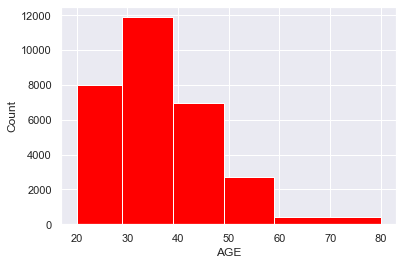

In [13]:
sns.set()
plt.hist(cred_d['AGE'],bins=[20,29,39,49,59,80],color='red')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

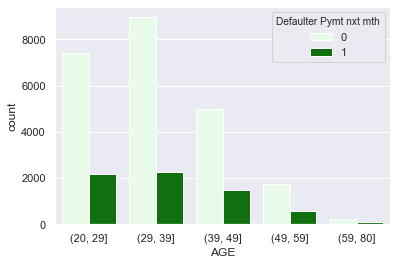

In [14]:
cred_d['AGE']=pd.cut(cred_d['AGE'],bins=[20,29,39,49,59,80] )
sns.countplot(x='AGE',data=cred_d, color='green', hue='Defaulter Pymt nxt mth')

In [15]:
#cred_d['AGE']=pd.cut(cred_d['AGE'],bins=[20,29,39,49,59,80],labels=('20s','30s','40s','50s','60s'))
#sns.countplot(x='AGE', data=cred_d,color='red')


In [16]:
#cred_d['AGE']=pd.cut(cred_d['AGE'],bins=[20,29,39,49,59,80],labels=('20s','30s','40s','50s','60s'))
#sns.countplot(x='Defaulter Pymt nxt mth',data=cred_d,color=red,hue='AGE')

In [17]:
#sns.distplot(cred_d['AGE'],bins=[20,29,39,49,59,80],color='red',kde=True)
#plt.xticks(range(20,90,20))

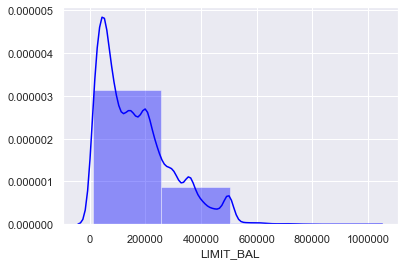

In [18]:
sns.distplot(cred_d['LIMIT_BAL'], bins=4, color='blue')


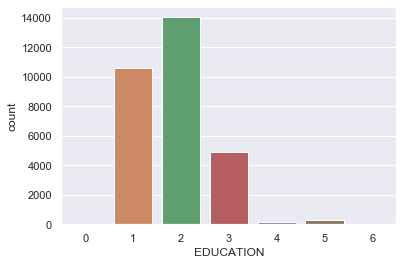

In [19]:
sns.countplot(x='EDUCATION', data=cred_d)

## Here in Education-
1=Graduate school

2=University

3=High school

4=Others

5=unknown, 6=unknown


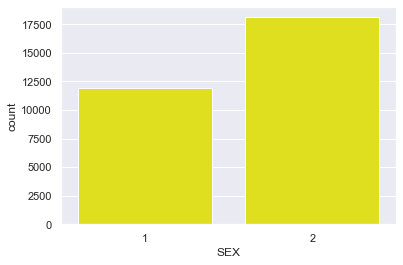

In [20]:
sns.countplot(x='SEX', data=cred_d,color='yellow')

## SEX-
MALE-->1

FEAMLE-->2

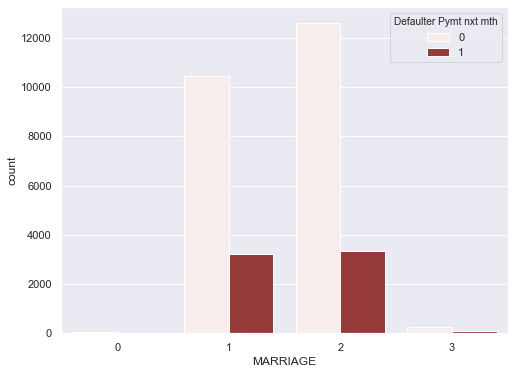

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='MARRIAGE',data=cred_d,color='brown',hue='Defaulter Pymt nxt mth')

## MARRIAGE-
MARRIED-->1,
SINGLE-->2,
OTHERS-->3

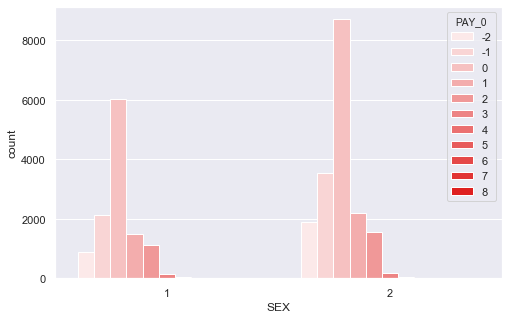

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='SEX',data=cred_d,color='red', hue='PAY_0')

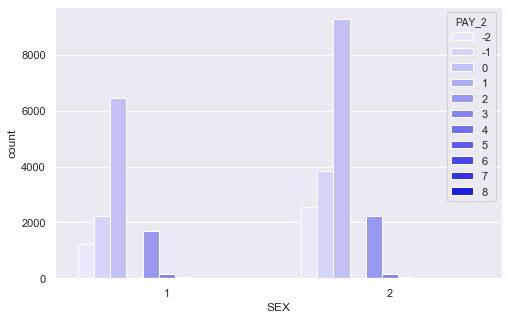

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='SEX',data=cred_d,color='blue', hue='PAY_2')

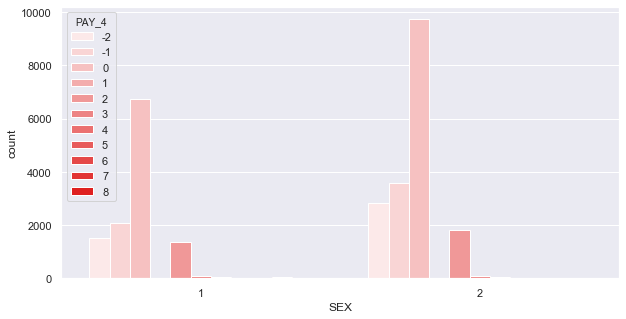

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='SEX',data=cred_d,color='red', hue='PAY_4')

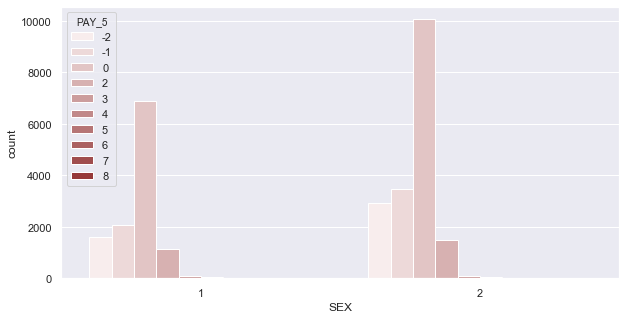

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='SEX',data=cred_d,color='brown', hue='PAY_5')

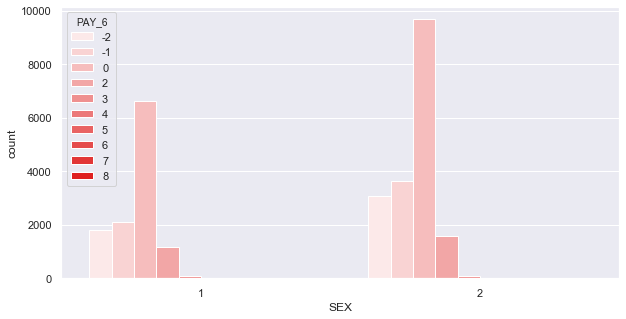

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='SEX',data=cred_d,color='red', hue='PAY_6')

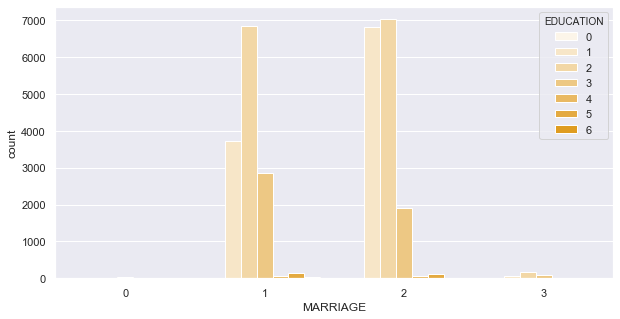

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='MARRIAGE',data=cred_d,color='orange',hue='EDUCATION')

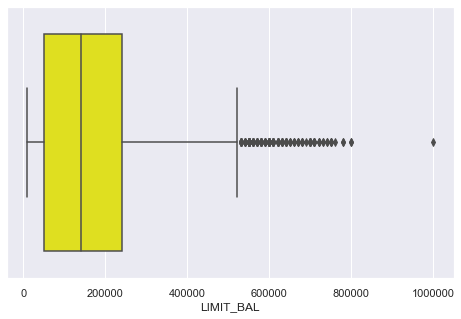

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LIMIT_BAL',data=cred_d,color='yellow')

In [29]:
#cred_d['Limit_cbrt']=np.cbrt(cred_d['LIMIT_BAL'])
#cred_d['Limit_cbrt'].hist(bins=20)

In [30]:
#plt.figure(figsize=(8,5))
#sns.boxplot(x='Limit_cbrt',data=cred_d,color='yellow')

In [31]:
#cred_d['BILL_AMT1'].describe()

In [32]:
#cred_d['BILL_AMT1_cbrt']=np.cbrt(cred_d['BILL_AMT1'])
#cred_d['BILL_AMT1_cbrt'].hist(bins=20)

In [33]:
#plt.figure(figsize=(8,5))
#sns.boxplot(y='BILL_AMT1_cbrt', data=cred_d, color='orange')


In [34]:
#cred_d['BILL_AMT2'].describe()

In [35]:
#cred_d['BILL_AMT2_cbrt']=np.cbrt(cred_d['BILL_AMT2'])
#cred_d['BILL_AMT2_cbrt'].hist(bins=20)

In [36]:
#plt.figure(figsize=(8,5))
#sns.boxplot(y='BILL_AMT2_cbrt', data=cred_d, color='orange')

In [37]:
q1,q2,q3=np.percentile(cred_d['BILL_AMT3'],[25,50,75])

In [38]:
q1,q2,q3

(2666.25, 20088.5, 60164.75)

In [39]:
iqr=q3-q1
iqr

57498.5

In [40]:
lower_boundary=q1-1.5*iqr
lower_boundary

-83581.5

In [41]:
upper_boundary=q3+1.5*iqr
upper_boundary

146412.5

In [42]:
cred_d['BILL_AMT3'].max()

1664089

In [43]:
cred_d['BILL_AMT3'].min()

-157264

In [44]:
cred_d['BILL_AMT3'].unique()

array([  689,  2682, 13559, ...,  2758, 76304, 49764], dtype=int64)

In [45]:
#cred_d['BILL_AMT3_cbrt']=np.cbrt(cred_d['BILL_AMT3'])
#cred_d['BILL_AMT3_cbrt'].hist(bins=20)

In [46]:
#plt.figure(figsize=(8,5))
#sns.boxplot(y='BILL_AMT3_cbrt', data=cred_d, color='orange')

In [47]:
#cred_d['BILL_AMT4_cbrt']=np.cbrt(cred_d['BILL_AMT4'])
#cred_d['BILL_AMT4_cbrt'].hist(bins=20)

In [48]:
#plt.figure(figsize=(8,5))
#sns.boxplot(y='BILL_AMT4_cbrt', data=cred_d, color='orange')


In [49]:
#cred_d['BILL_AMT5_cbrt']=np.cbrt(cred_d['BILL_AMT5'])
#cred_d['BILL_AMT5_cbrt'].hist(bins=20)

In [50]:
#plt.figure(figsize=(8,5))
#sns.boxplot(x='BILL_AMT5_cbrt',data=cred_d,color='orange')

Text(0.5, 0, 'BILL_AMT3')

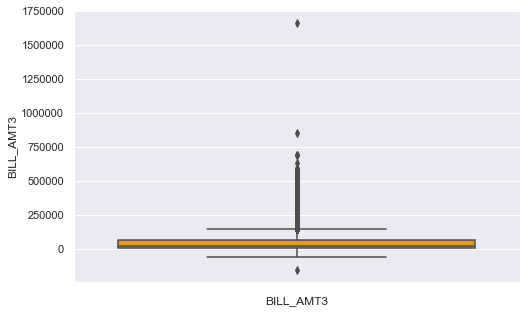

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(y='BILL_AMT3', data=cred_d, color='orange')
plt.xlabel('BILL_AMT3')

Text(0.5, 0, 'BILL_AMT5')

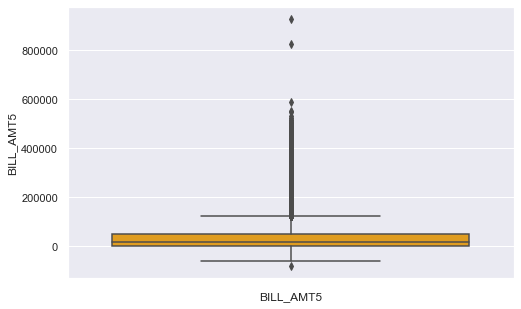

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(y='BILL_AMT5', data=cred_d, color='orange')
plt.xlabel('BILL_AMT5')

Text(0.5, 0, 'BILL_AMT6')

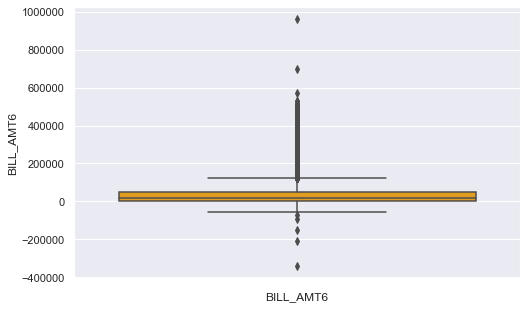

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(y='BILL_AMT6', data=cred_d, color='orange')
plt.xlabel('BILL_AMT6')

In [54]:
#cred_d['AGE'].describe()

In [55]:
#cred_d['New_AGE']=np.where(cred_d['AGE']>=41,41,cred_d['AGE'])
#cred_d.head()

In [56]:
#plt.figure(figsize=(8,5))
#sns.boxplot(y='New_AGE', data=cred_d, color='green')
#plt.xlabel('New_AGE')

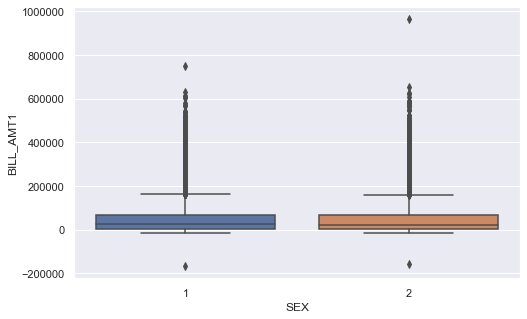

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='BILL_AMT1', data=cred_d)


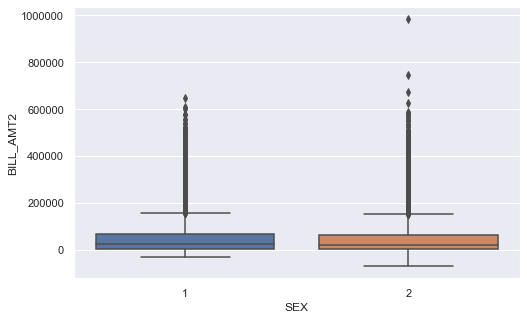

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='BILL_AMT2', data=cred_d)

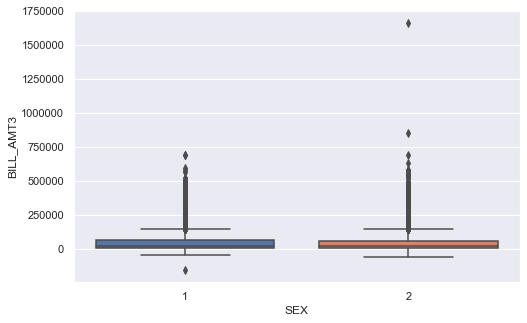

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='BILL_AMT3', data=cred_d)

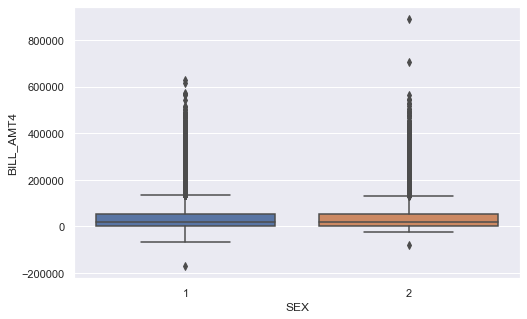

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='BILL_AMT4', data=cred_d)

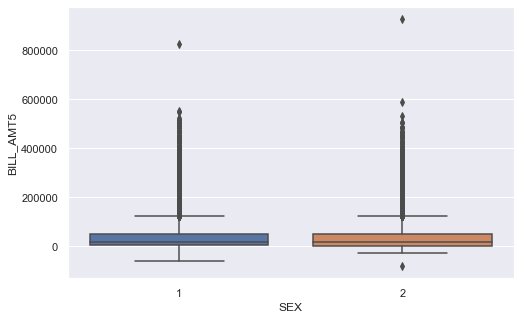

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='BILL_AMT5', data=cred_d)

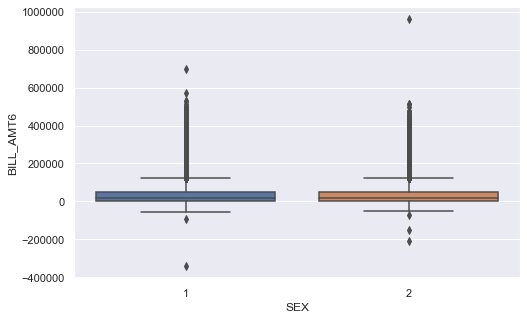

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='BILL_AMT6', data=cred_d)

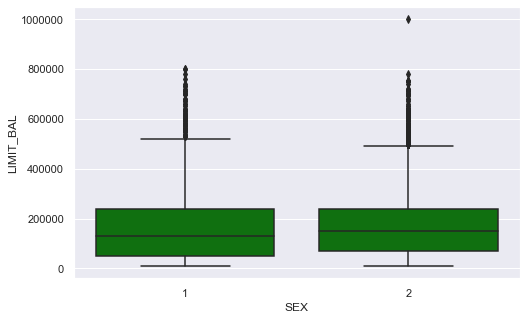

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SEX',y='LIMIT_BAL', data=cred_d,color='green')

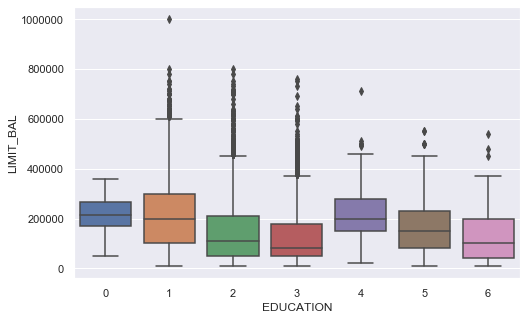

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(x='EDUCATION',y='LIMIT_BAL', data=cred_d)

## EDUCATION-
1=Graduate school, 2=University, 3=High school, 4=others, 5=unknown, 6=unknown

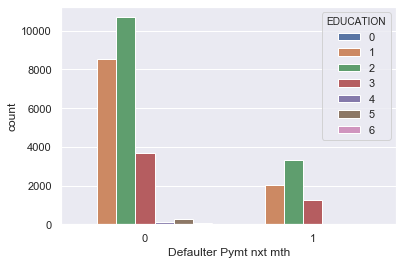

In [65]:
sns.countplot(x='Defaulter Pymt nxt mth',data=cred_d,hue='EDUCATION')

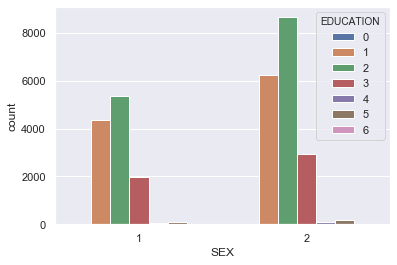

In [66]:
sns.countplot(x='SEX',data=cred_d,hue='EDUCATION')

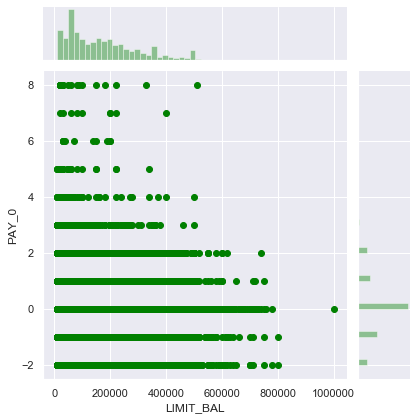

In [67]:
sns.jointplot(x='LIMIT_BAL',y='PAY_0',color='green' , data=cred_d)

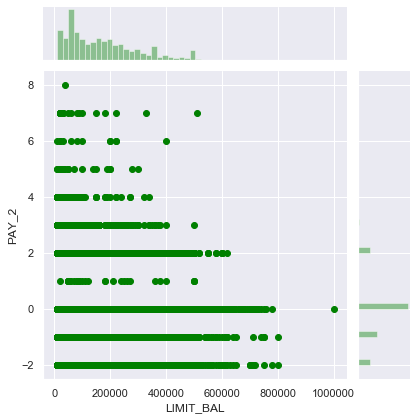

In [68]:
sns.jointplot(x='LIMIT_BAL',y='PAY_2',color='green' , data=cred_d)

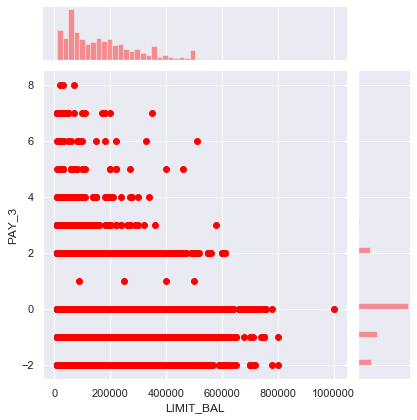

In [69]:
sns.jointplot(x='LIMIT_BAL',y='PAY_3',color='red' , data=cred_d)

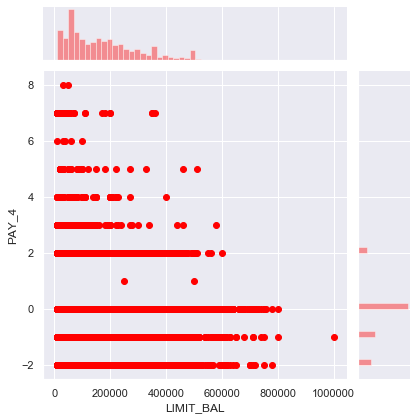

In [70]:
sns.jointplot(x='LIMIT_BAL',y='PAY_4',color='red' , data=cred_d)

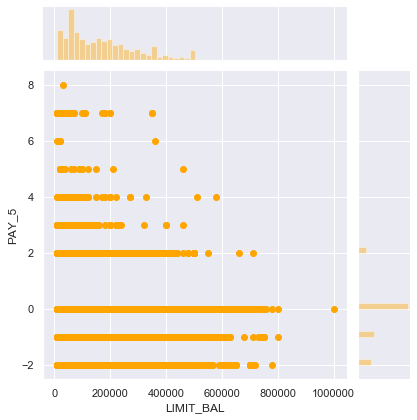

In [71]:
sns.jointplot(x='LIMIT_BAL',y='PAY_5',color='orange' , data=cred_d)

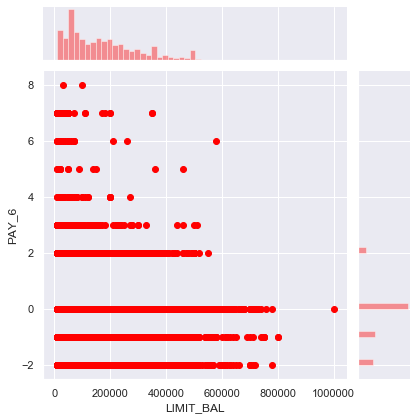

In [72]:
sns.jointplot(x='LIMIT_BAL',y='PAY_6',color='red' , data=cred_d)

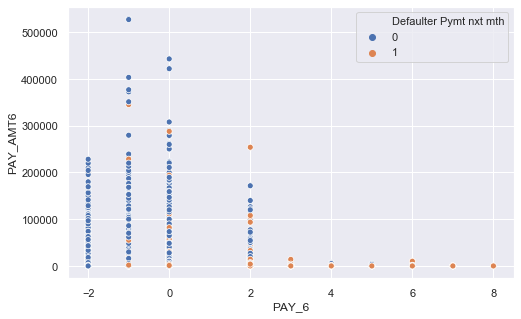

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'PAY_6', y='PAY_AMT6', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

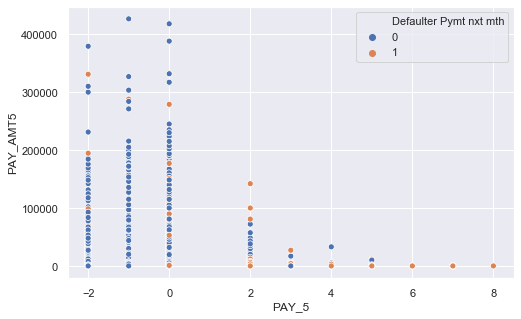

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'PAY_5', y='PAY_AMT5', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

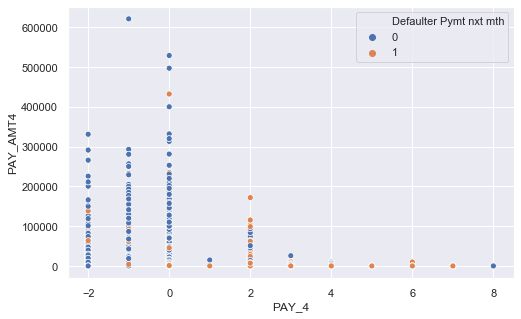

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'PAY_4', y='PAY_AMT4', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

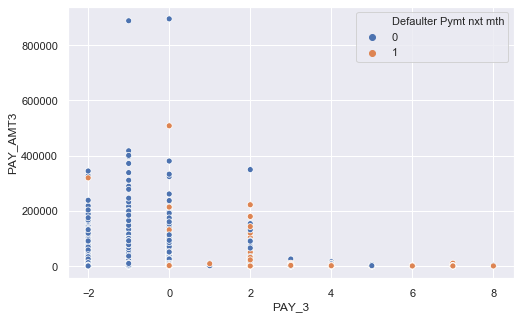

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'PAY_3', y='PAY_AMT3', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

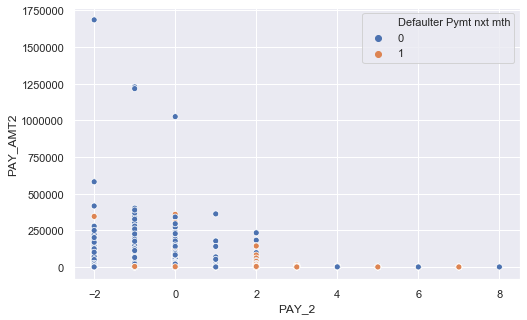

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'PAY_2', y='PAY_AMT2', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

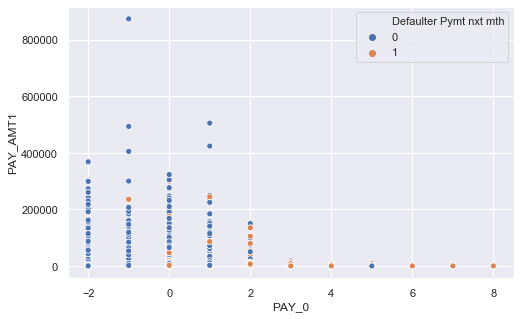

In [78]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'PAY_0', y='PAY_AMT1', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

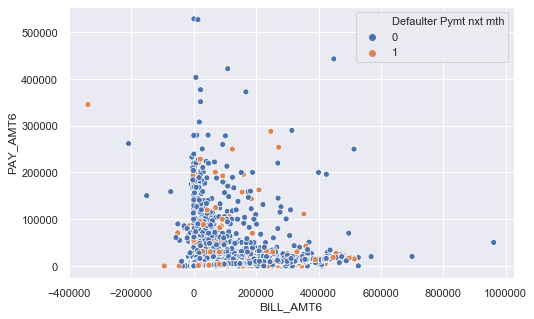

In [79]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BILL_AMT6', y='PAY_AMT6', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

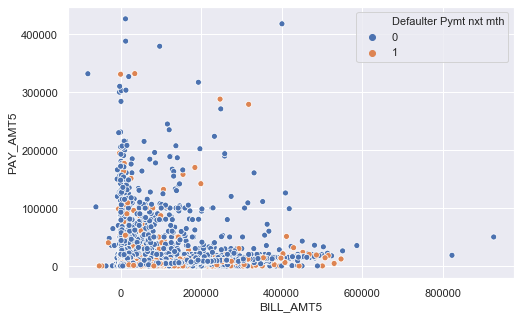

In [80]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BILL_AMT5', y='PAY_AMT5', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

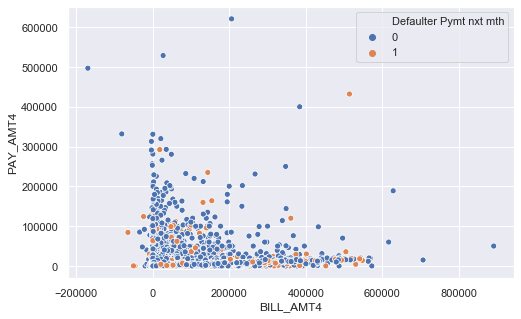

In [81]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BILL_AMT4', y='PAY_AMT4', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

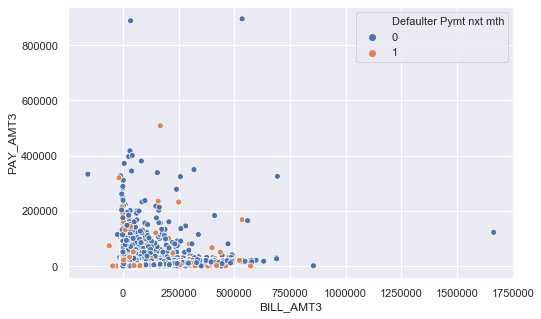

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BILL_AMT3', y='PAY_AMT3', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

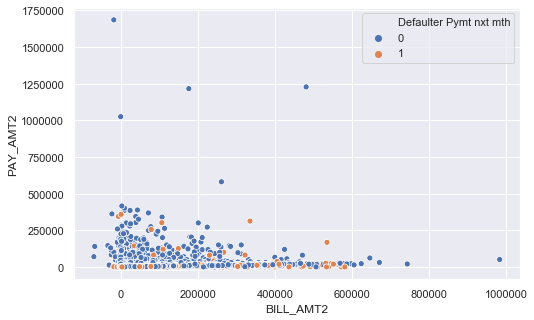

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BILL_AMT2', y='PAY_AMT2', hue='Defaulter Pymt nxt mth', color='red',data=cred_d,legend='full')

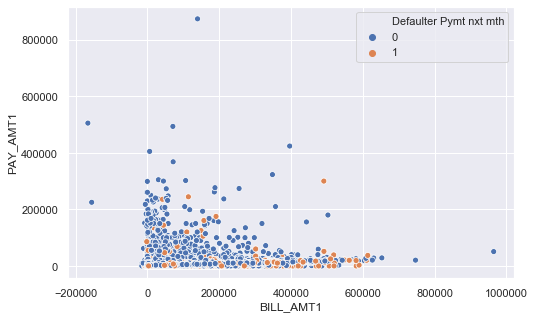

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BILL_AMT1', y='PAY_AMT1', hue='Defaulter Pymt nxt mth', color='red',data=cred_d)

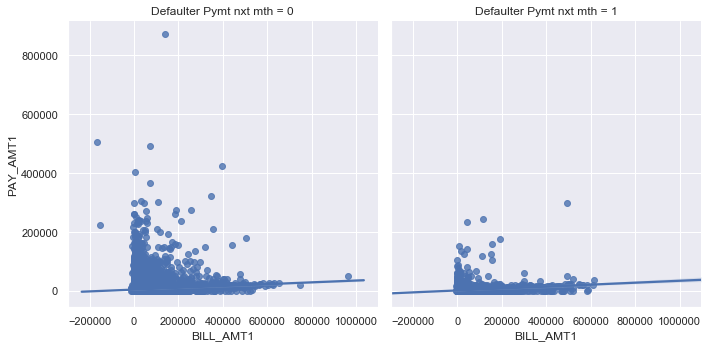

In [85]:
sns.lmplot(x='BILL_AMT1', y='PAY_AMT1',col='Defaulter Pymt nxt mth', data=cred_d)

Text(0, 0.5, 'Frequency')

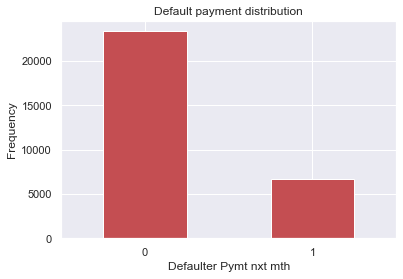

In [86]:
count_classes=pd.value_counts(cred_d['Defaulter Pymt nxt mth'],sort=True)
count_classes.plot(kind='bar',color='r',rot=0)
plt.title('Default payment distribution')
plt.xticks(range(2))
plt.xlabel('Defaulter Pymt nxt mth')
plt.ylabel('Frequency')


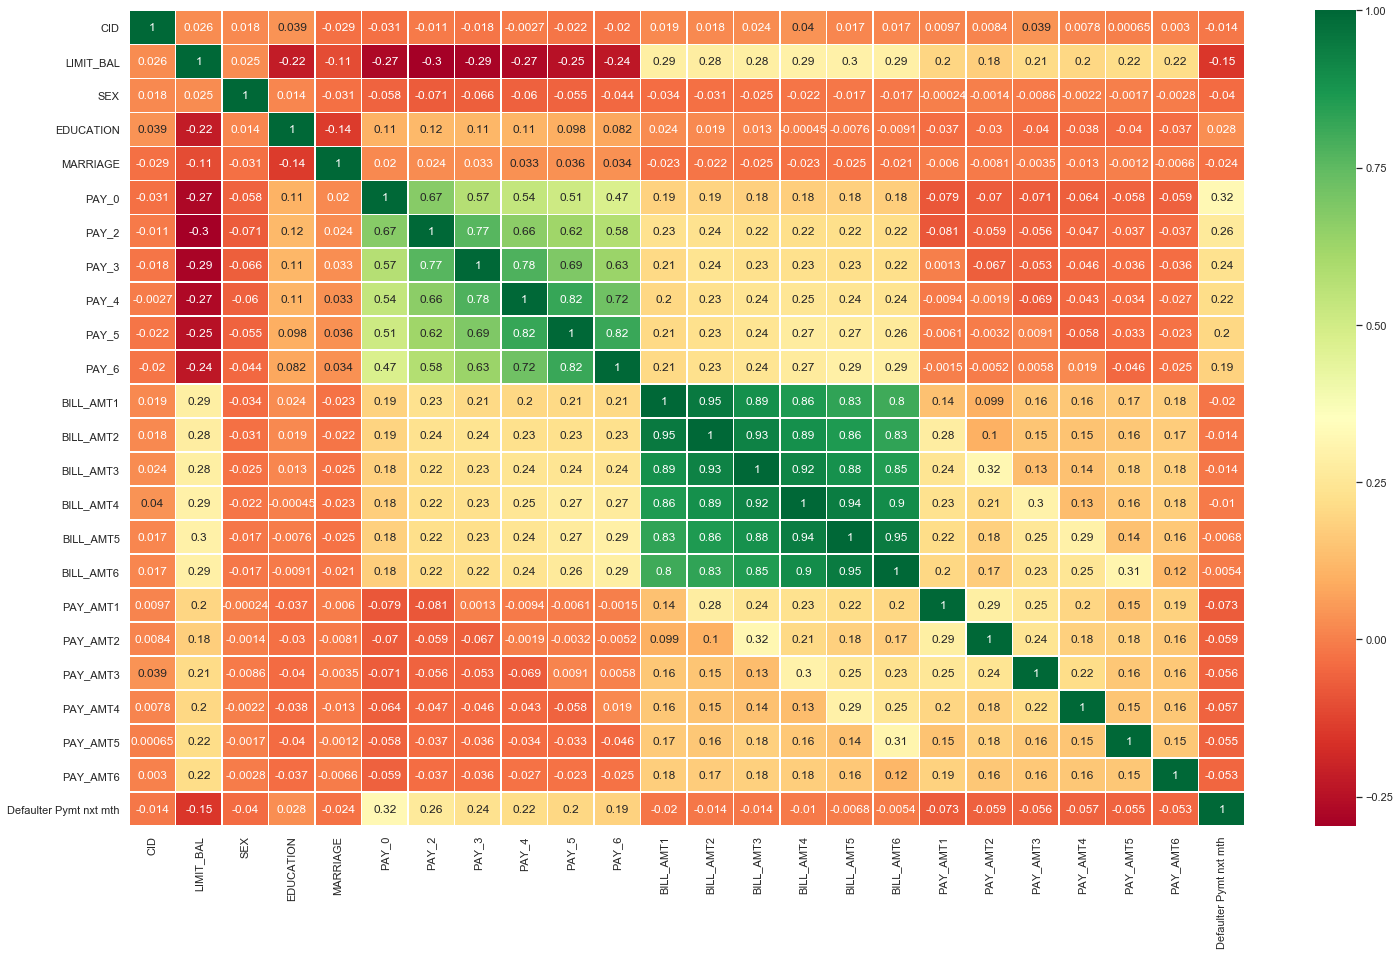

In [87]:
plt.figure(figsize=(25,15))
sns.heatmap(cred_d.corr(),annot=True,linewidth=0.5,cmap='RdYlGn')

In [88]:
cred_d1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter Pymt nxt mth
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [89]:
x=cred_d1.loc[:,cred_d1.columns !='Defaulter Pymt nxt mth']
y=cred_d1['Defaulter Pymt nxt mth']


In [90]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [91]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(random_state=0)
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [92]:
print(model.feature_importances_)

[0.06727523 0.01147072 0.03030523 0.02009045 0.06739042 0.10280684
 0.03485409 0.04025546 0.02243846 0.03760856 0.03181919 0.05008764
 0.04684564 0.04490552 0.04446268 0.04471325 0.04378147 0.04342742
 0.04248707 0.04351584 0.03947269 0.04360807 0.04637808]


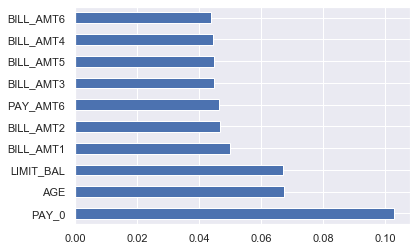

In [93]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [94]:
x.drop(['SEX','EDUCATION','MARRIAGE','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT2','PAY_AMT1','PAY_AMT3','PAY_AMT4','PAY_AMT5'],axis=1,inplace=True)
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6
0,20000,24,2,3913,3102,689,0,0,0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679


## Handle Outlier

In [95]:
x['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [96]:
x['New_LIMIT_BAL']=np.where(x['LIMIT_BAL']>=240000,240000,x['LIMIT_BAL'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL
0,20000,24,2,3913,3102,689,0,0,0,0,20000
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000


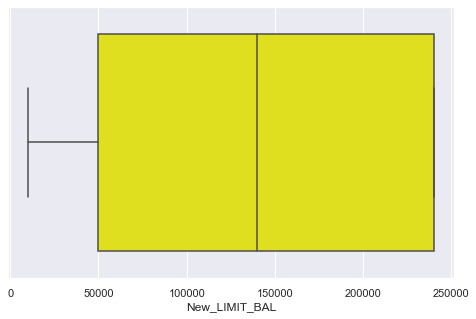

In [97]:
plt.figure(figsize=(8,5))
sns.boxplot(x='New_LIMIT_BAL',data=x,color='yellow')

In [98]:
x['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [99]:
x['New_BILL_AMT1']=np.where(x['BILL_AMT1']>=67091,67091,x['BILL_AMT1'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617


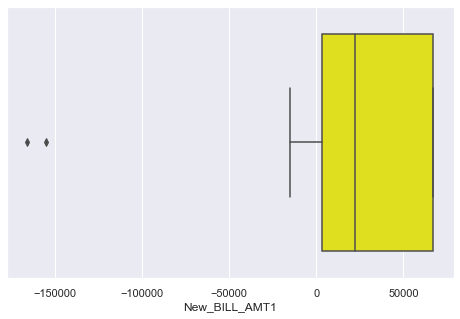

In [100]:
plt.figure(figsize=(8,5))
sns.boxplot(x='New_BILL_AMT1',data=x,color='yellow')

In [101]:
x['BILL_AMT2'].describe()

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

In [102]:
x['New_BILL_AMT2']=np.where(x['BILL_AMT2']>=64006.25,64006.25,x['BILL_AMT2'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0


In [103]:
x['BILL_AMT3'].describe()

count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

In [104]:
x['New_BILL_AMT3']=np.where(x['BILL_AMT3']>=60164.75,60164.75,x['BILL_AMT3'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0


Text(0.5, 0, 'New_BILL_AMT3')

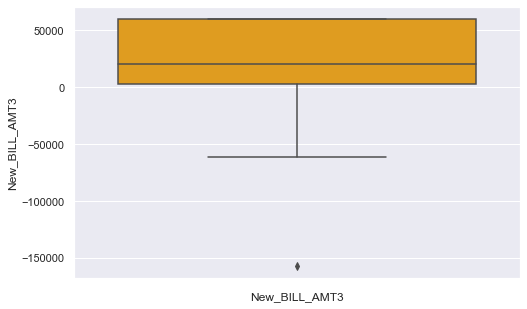

In [105]:
plt.figure(figsize=(8,5))
sns.boxplot(y='New_BILL_AMT3', data=x, color='orange')
plt.xlabel('New_BILL_AMT3')

In [106]:
x['BILL_AMT4'].describe()

count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64

In [107]:
x['New_BILL_AMT4']=np.where(x['BILL_AMT4']>=54506,54506,x['BILL_AMT4'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0,3272
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0,14331
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0,28314
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0,20940


Text(0.5, 0, 'New_BILL_AMT4')

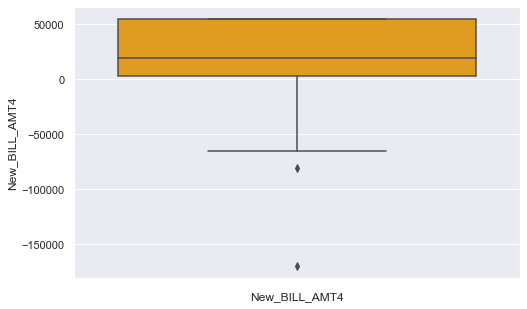

In [108]:
plt.figure(figsize=(8,5))
sns.boxplot(y='New_BILL_AMT4', data=x, color='orange')
plt.xlabel('New_BILL_AMT4')

In [109]:
x['BILL_AMT5'].describe()

count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64

In [110]:
x['New_BILL_AMT5']=np.where(x['BILL_AMT5']>=50190.5,50190.5,x['BILL_AMT5'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4,New_BILL_AMT5
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0,0,0.0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0,3272,3455.0
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0,14331,14948.0
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0,28314,28959.0
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0,20940,19146.0


Text(0.5, 0, 'New_BILL_AMT5')

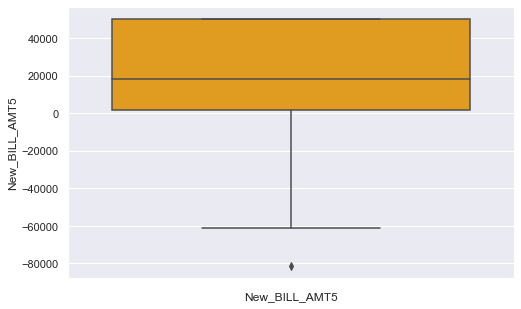

In [111]:
plt.figure(figsize=(8,5))
sns.boxplot(y='New_BILL_AMT5', data=x, color='orange')
plt.xlabel('New_BILL_AMT5')

In [112]:
x['BILL_AMT6'].describe()

count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64

In [113]:
x['New_BILL_AMT6']=np.where(x['BILL_AMT6']>=49198.25,49198.25,x['BILL_AMT6'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4,New_BILL_AMT5,New_BILL_AMT6
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0,0,0.0,0.0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0,3272,3455.0,3261.0
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0,14331,14948.0,15549.0
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0,28314,28959.0,29547.0
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0,20940,19146.0,19131.0


Text(0.5, 0, 'New_BILL_AMT6')

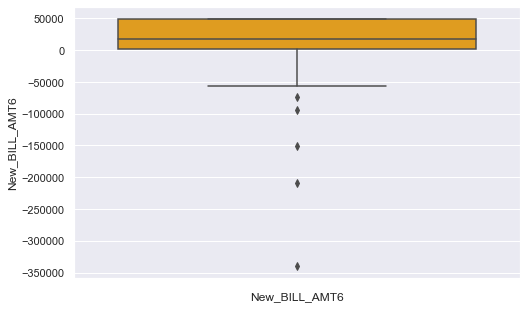

In [114]:
plt.figure(figsize=(8,5))
sns.boxplot(y='New_BILL_AMT6', data=x, color='orange')
plt.xlabel('New_BILL_AMT6')

In [115]:
#x['PAY_AMT1'].describe()

In [116]:
#x['New_PAY_AMT1']=np.where(x['PAY_AMT1']>=5006,5006,x['PAY_AMT1'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4,New_BILL_AMT5,New_BILL_AMT6
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0,0,0.0,0.0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0,3272,3455.0,3261.0
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0,14331,14948.0,15549.0
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0,28314,28959.0,29547.0
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0,20940,19146.0,19131.0


In [117]:
#plt.figure(figsize=(8,5))
#sns.boxplot(y='New_PAY_AMT1', data=x, color='red')
#plt.xlabel('New_PAY_AMT1')

In [118]:
x['PAY_AMT6'].describe()

count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64

In [119]:
x['New_PAY_AMT6']=np.where(x['PAY_AMT6']>=4000,4000,x['PAY_AMT6'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4,New_BILL_AMT5,New_BILL_AMT6,New_PAY_AMT6
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0,0,0.0,0.0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0,3272,3455.0,3261.0,2000
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0,14331,14948.0,15549.0,4000
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0,28314,28959.0,29547.0,1000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0,20940,19146.0,19131.0,679


Text(0.5, 0, 'New_PAY_AMT6')

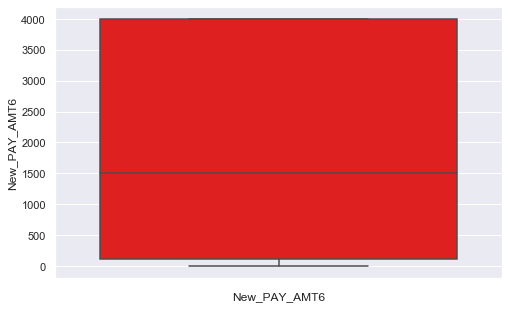

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(y='New_PAY_AMT6', data=x, color='red')
plt.xlabel('New_PAY_AMT6')

In [121]:
x['PAY_0'].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64

In [122]:
x['New_PAY_0']=np.where(x['PAY_0']>=4000,4000,x['PAY_0'])
x.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT6,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4,New_BILL_AMT5,New_BILL_AMT6,New_PAY_AMT6,New_PAY_0
0,20000,24,2,3913,3102,689,0,0,0,0,20000,3913,3102.0,689.0,0,0.0,0.0,0,2
1,120000,26,-1,2682,1725,2682,3272,3455,3261,2000,120000,2682,1725.0,2682.0,3272,3455.0,3261.0,2000,-1
2,90000,34,0,29239,14027,13559,14331,14948,15549,5000,90000,29239,14027.0,13559.0,14331,14948.0,15549.0,4000,0
3,50000,37,0,46990,48233,49291,28314,28959,29547,1000,50000,46990,48233.0,49291.0,28314,28959.0,29547.0,1000,0
4,50000,57,-1,8617,5670,35835,20940,19146,19131,679,50000,8617,5670.0,35835.0,20940,19146.0,19131.0,679,-1


In [123]:
#x['SEX']=np.where(x['SEX']=='Male',0,1)
#x.head()

In [124]:
x.drop(['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT6','PAY_0'],axis=1,inplace=True)
x.head()

,AGE,New_LIMIT_BAL,New_BILL_AMT1,New_BILL_AMT2,New_BILL_AMT3,New_BILL_AMT4,New_BILL_AMT5,New_BILL_AMT6,New_PAY_AMT6,New_PAY_0
0,24,20000,3913,3102.0,689.0,0,0.0,0.0,0,2
1,26,120000,2682,1725.0,2682.0,3272,3455.0,3261.0,2000,-1
2,34,90000,29239,14027.0,13559.0,14331,14948.0,15549.0,4000,0
3,37,50000,46990,48233.0,49291.0,28314,28959.0,29547.0,1000,0
4,57,50000,8617,5670.0,35835.0,20940,19146.0,19131.0,679,-1


In [125]:
#x['Limit_log']=np.log(x['LIMIT_BAL'])
#x['Limit_log'].hist(bins=20)

In [126]:
#x['Limit_sqrt']=np.sqrt(x['LIMIT_BAL'])
#x['Limit_sqrt'].hist(bins=20)

In [127]:
from sklearn.preprocessing import StandardScaler
robust_sclr=StandardScaler()
x=robust_sclr.fit_transform(x)
x

array([[-1.24601985, -1.45170324, -0.98401725, ..., -1.06797232,
        -1.15098128,  1.79456386],
       [-1.02904717, -0.23447881, -1.02982785, ..., -0.90635598,
         0.09700134, -0.87499115],
       [-0.16115646, -0.59964614, -0.04153194, ..., -0.29735825,
         1.34498397,  0.01486052],
       ...,
       [ 0.16430256, -1.3299808 , -0.99696777, ..., -0.10863239,
         0.78339179,  3.57426721],
       [ 0.59824792, -0.72136858, -1.19085344, ...,  1.35771004,
        -0.02530095,  0.90471219],
       [ 1.14067961, -1.08653591,  0.65400033, ..., -0.3090545 ,
        -0.52698997,  0.01486052]])

In [128]:
### Applying Train-Test method with Logistic Regression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
lreg=LogisticRegression()
lreg.fit(x_train,y_train)
y_pred= lreg.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[6893,  167],
       [1528,  412]], dtype=int64)

In [130]:
accuracy_score(y_test,y_pred)

0.8116666666666666

In [131]:
from sklearn.metrics import roc_curve,auc
y_score = lreg.fit(x_train,y_train).decision_function(x_test)
fpr,tpr,thresolds=roc_curve(y_test,y_score)

AUC: 0.7214603837504746


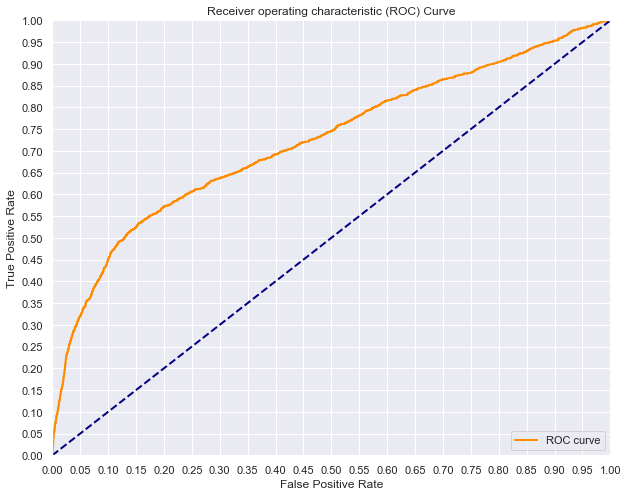

In [132]:
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [133]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7060
           1       0.71      0.21      0.33      1940

    accuracy                           0.81      9000
   macro avg       0.77      0.59      0.61      9000
weighted avg       0.80      0.81      0.77      9000



## Applying K-fold method

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
kfold=KFold(n_splits=10, random_state=5)
y_pred=cross_val_predict(lreg,x,y,cv=10)
print('Aaccuracy Score with Kfold:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Aaccuracy Score with Kfold: 0.8056666666666666


array([[22754,   610],
       [ 5220,  1416]], dtype=int64)

In [135]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x,y)
y_pred=cross_val_predict(classifier,x,y,cv=10)
print('Accuracy score of Naive bayes:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy score of Naive bayes: 0.8119666666666666


array([[22274,  1090],
       [ 4551,  2085]], dtype=int64)

In [136]:
from sklearn.metrics import classification_report
report1=classification_report(y,y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     23364
           1       0.66      0.31      0.43      6636

    accuracy                           0.81     30000
   macro avg       0.74      0.63      0.66     30000
weighted avg       0.79      0.81      0.79     30000



In [137]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
d_tree.fit(x,y)
y_pred=cross_val_predict(d_tree,x,y,cv=10)
print('Accuracy score of Decision Tree:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy score of Decision Tree: 0.7366


array([[19482,  3882],
       [ 4020,  2616]], dtype=int64)

In [138]:
from sklearn.metrics import classification_report
report2=classification_report(y,y_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     23364
           1       0.40      0.39      0.40      6636

    accuracy                           0.74     30000
   macro avg       0.62      0.61      0.61     30000
weighted avg       0.73      0.74      0.74     30000



In [139]:
from sklearn.svm import SVC
svm=SVC(gamma='auto')
svm.fit(x,y)
y_pred=cross_val_predict(svm,x,y,cv=10)
print('Accuracy score of SVM:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy score of SVM: 0.8189666666666666


array([[22500,   864],
       [ 4567,  2069]], dtype=int64)

In [140]:
from sklearn.metrics import classification_report
report3=classification_report(y,y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     23364
           1       0.71      0.31      0.43      6636

    accuracy                           0.82     30000
   macro avg       0.77      0.64      0.66     30000
weighted avg       0.80      0.82      0.79     30000



In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x,y)
y_pred=cross_val_predict(rf,x,y,cv=10)
print('Accuracy score of Randomforest:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy score of Randomforest: 0.8098


array([[22048,  1316],
       [ 4390,  2246]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report
report4=classification_report(y,y_pred)
print(report4)

              precision    recall  f1-score   support

           0       0.83      0.94      0.89     23364
           1       0.63      0.34      0.44      6636

    accuracy                           0.81     30000
   macro avg       0.73      0.64      0.66     30000
weighted avg       0.79      0.81      0.79     30000



In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gbclass=GradientBoostingClassifier(random_state=0)
gbclass.fit(x,y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [144]:
y_pred=cross_val_predict(gbclass,x,y,cv=10)
print('Accuracy score of GradientBoosting:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy score of GradientBoosting: 0.8201


array([[22378,   986],
       [ 4411,  2225]], dtype=int64)

In [145]:
from sklearn.metrics import classification_report
report5=classification_report(y,y_pred)
print(report5)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     23364
           1       0.69      0.34      0.45      6636

    accuracy                           0.82     30000
   macro avg       0.76      0.65      0.67     30000
weighted avg       0.80      0.82      0.79     30000



In [146]:
gbclass1=GradientBoostingClassifier(learning_rate=0.01,max_depth=2,random_state=0)
gbclass1.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [147]:
y_pred=cross_val_predict(gbclass1,x,y,cv=10)
print('Accuracy score of GradientBoosting1:', accuracy_score(y,y_pred))
confusion_matrix(y,y_pred)

Accuracy score of GradientBoosting1: 0.8194


array([[22540,   824],
       [ 4594,  2042]], dtype=int64)

In [148]:
from sklearn.metrics import classification_report
report6=classification_report(y,y_pred)
print(report6)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     23364
           1       0.71      0.31      0.43      6636

    accuracy                           0.82     30000
   macro avg       0.77      0.64      0.66     30000
weighted avg       0.80      0.82      0.79     30000



In [149]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [150]:
#from sklearn.model_selection import cross_val_score
#lregscore=cross_val_score(lreg,x,y,cv=10)
#lregscore

In [151]:
#lregscore.mean()

In [152]:
#gaunvscore=cross_val_score(classifier,x,y,cv=10)

In [153]:
#gaunvscore.mean()

In [154]:
#d_treescore=cross_val_score(d_tree,x,y,cv=10)
#d_treescore.mean()

In [155]:
#svmscore=cross_val_score(svm,x,y,cv=10)
#svmscore.mean()

In [156]:
#rfscore=cross_val_score(rf,x,y,cv=10)
#rfscore.mean()

## Parameter tunning using k fold cross validation


In [157]:
rfscore1=cross_val_score(RandomForestClassifier(n_estimators=5),x,y,cv=10)
rfscores1.mean()

NameError: name 'cross_val_score' is not defined